## ET Entrega 1 
# Caso Análisis de Condiciones Climáticas en Australia

* Maura Ruminot
* Paula Romero

## Contexto

<font color = 'blue'>
EDA: 

1. [Carga y Revisión de Data](#1)
2. [Descripción de variables](#2)
1. [Análisis de variables](#3)
    * [Variables Categóricas](#4)
    * [Variables Numéricas](#5)
1. [Análisis con gráficos](#6)
1. [ ](#7)

<a id = "1"></a><br>
# Carga y Revisión de Data

In [1]:
# Importación de librerías
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('weatherAUS.csv')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


### * Información de la data

In [3]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


### Vemos los tipo de datos de cada columna

In [4]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

### Buscamos nulos por columnas

In [6]:
data.columns[data.isnull().any()]

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')

In [7]:
#Bucando los datos nulos por tabla
data.isnull().sum().sort_values(ascending=False)

Sunshine         67816
Evaporation      60843
Cloud3pm         57094
Cloud9am         53657
Pressure9am      14014
Pressure3pm      13981
WindDir9am       10013
WindGustDir       9330
WindGustSpeed     9270
WindDir3pm        3778
Humidity3pm       3610
Temp3pm           2726
WindSpeed3pm      2630
Humidity9am       1774
RainToday         1406
Rainfall          1406
WindSpeed9am      1348
Temp9am            904
MinTemp            637
MaxTemp            322
RISK_MM              0
Date                 0
Location             0
RainTomorrow         0
dtype: int64

<a id = "1"></a><br>
# Descripción de variables

- Date: fecha de la observación.
- Location: ubicación de la estación meteorológica.
- MinTemp: temperatura mínima en grados Celsius.
- MaxTemp: temperatura máxima en grados Celsius.
- Rainfall: cantidad de lluvia registrada ese día en mm.
- Evaporation: evaporación (mm) en 24 horas.
- Sunshine: número de horas de sol brillante en el día.
- WindGustDir: dirección de la ráfaga de viento más fuerte en 24 horas.
- WindGustSpeed: velocidad (km/hr) de la ráfaga de viento más fuerte en 24 horas.
- WindDir9am: dirección del viento a las 9am.
- WindDir3pm: dirección del viento a las 3pm.
- WindSpeed9am: velocidad (km/hr) del viento a las 9am.
- WindSpeed3pm: velocidad (km/hr) del viento a las 3pm.
- Humidity9am: porcentaje de humedad a las 9am.
- Humidity3pm:  porcentaje de humedad a las 3pm.
- Pressure9am: presión atmosférica (hpa) a nivel del mar a las 9am.
- Pressure3pm: presión atmosférica (hpa) a nivel del mar a las 3pm.
- Cloud9am: fración del cielo cubierto por nubes a las 9am. Se mide en "octavos", de manera que un valor 0 indica cielo totalmente despejado y 8, cielo totalmente cubierto.
- Cloud3p fración del cielo cubierto por nubes a las 3pm. Se mide en "octavos", de manera que un valor 0 indica cielo totalmenete despejado y 8, cielo totalmente cubieto.:
- Temp: 9temperatura en grados celsius a lasm..m: 
- Temp: 3temperatura en grados celsius a las 3p: 
- RainToday:To variable indicadora que toma el valor 1 si la precipitación en mm. en las últimas 24 hrs. excede 1 mm. y 0 si ny:
- RI_MM:SK La cantidad de lluvia. Una especie de medida del "riesgoM:
- RainTomorrow:ovariable indicadora que toma el valor 1 si al día siguiente llovió y 0 si no.no.

<a id = "3"></a><br>
# Análisis de variables

* 17 son variables númericas.
* 7 son variables categóricas.

<a id = "3"></a><br>
# - Variables númericas

In [8]:
def plot_hist(variable, color='purple'):
    plt.figure(figsize=(9, 3))
    plt.hist(data[variable], bins=50, color=color)
    plt.xlabel(variable)
    plt.ylabel("Cantidad")
    plt.title("Distribución de {}".format(variable))
    plt.show()

In [9]:
# Lista de variables numéricas para el analisis
numeVar = ["MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine", 
           "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", 
           "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", 
           "Cloud9am", "Cloud3pm", "Temp9am", "Temp3pm", "RISK_MM"]


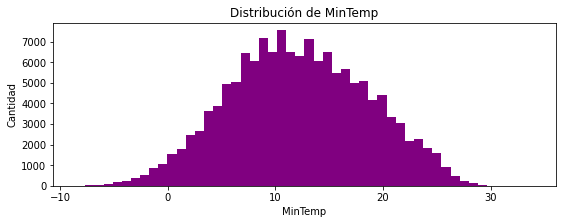

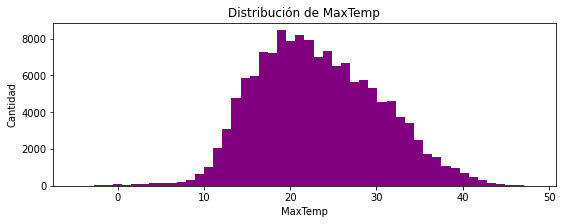

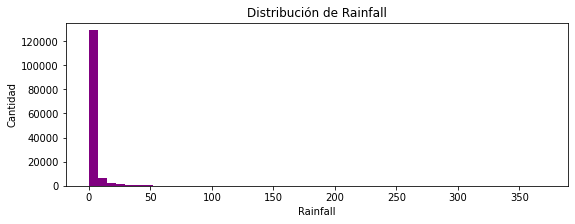

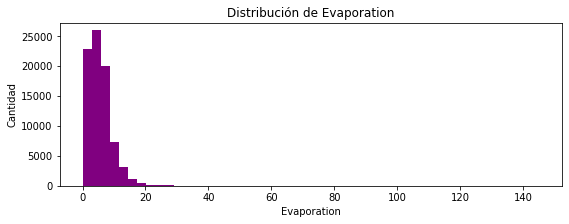

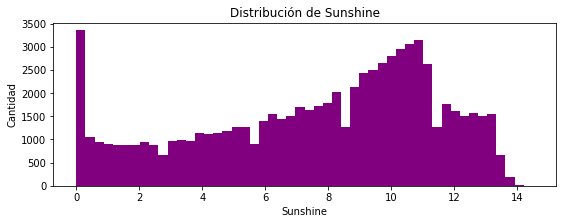

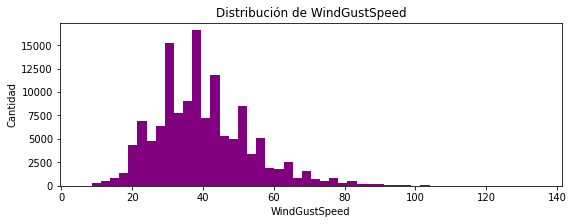

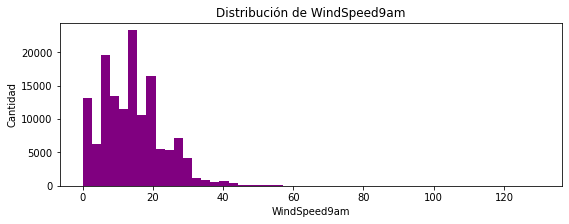

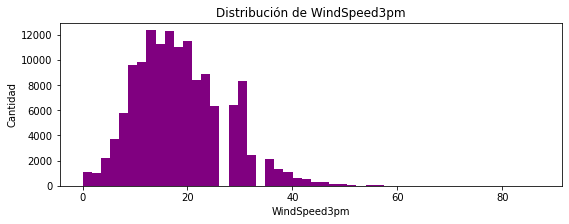

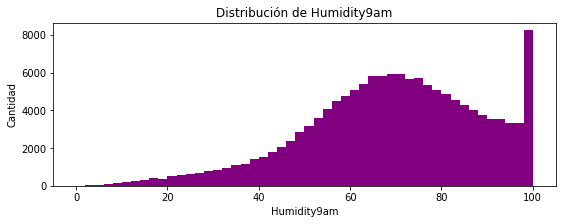

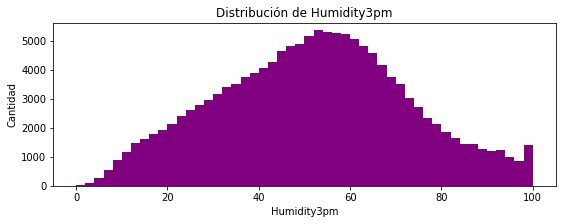

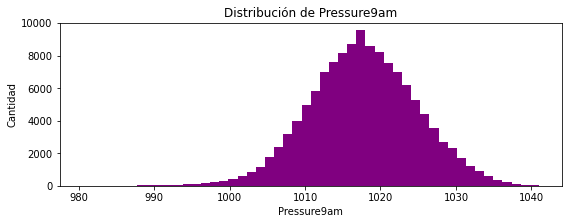

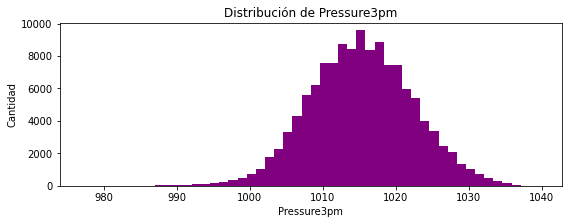

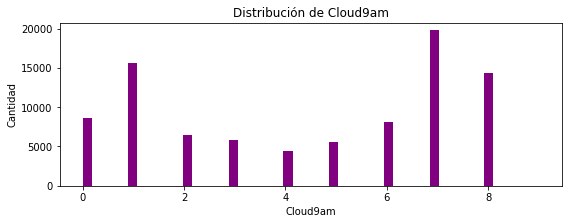

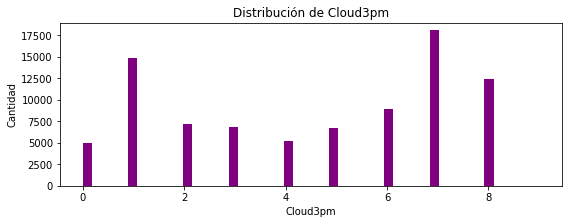

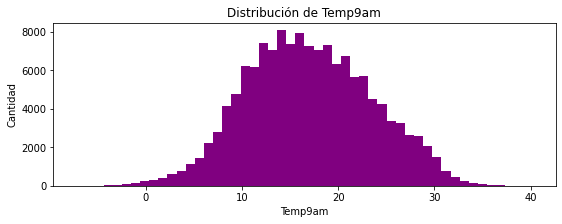

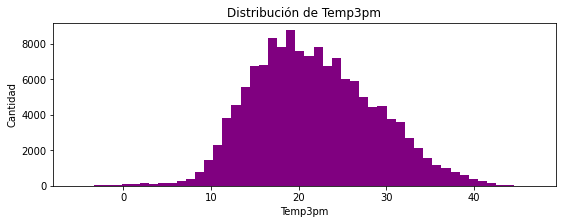

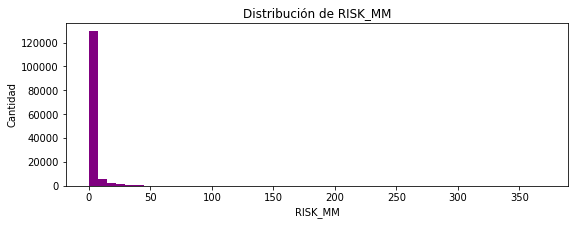

In [10]:
# Realizamos los graficos para analizar la distribución
for n in numeVar:
    plot_hist(n)

<a id = "3"></a><br>
# - Variables categóricas

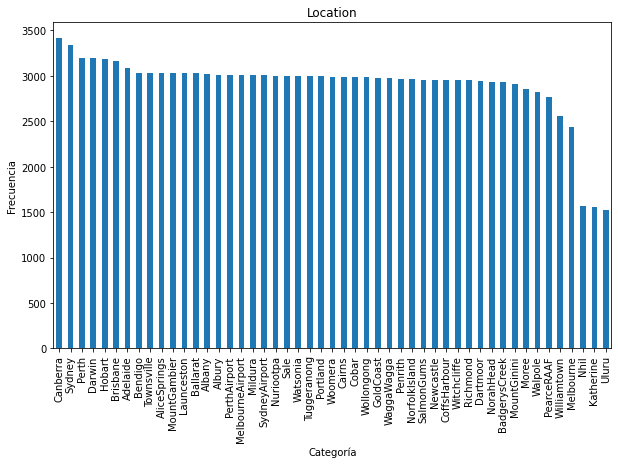

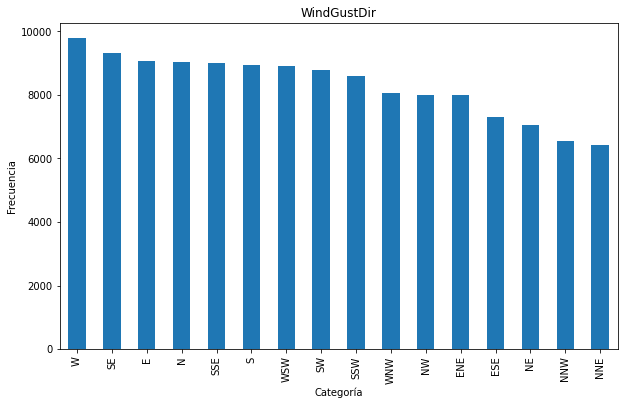

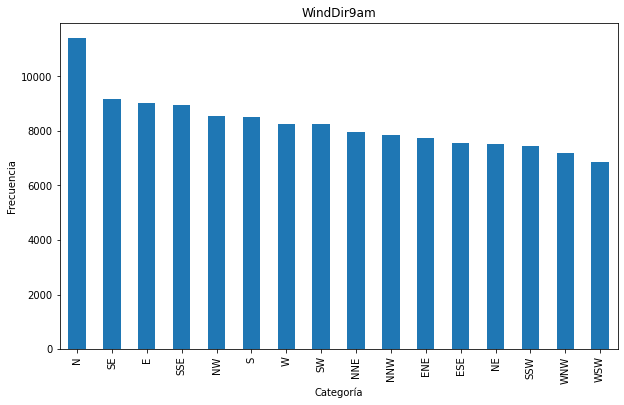

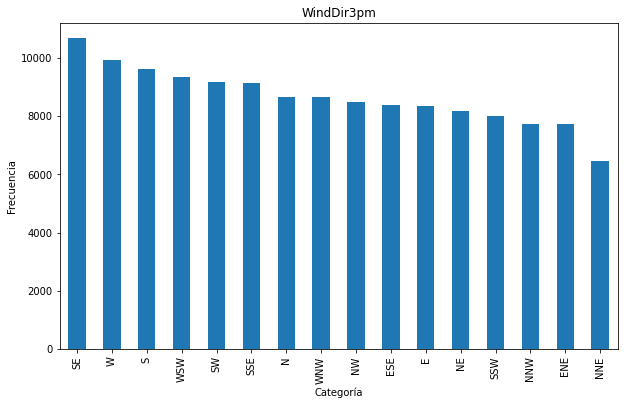

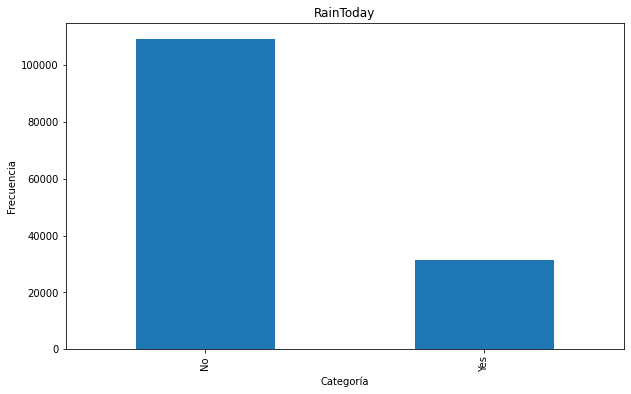

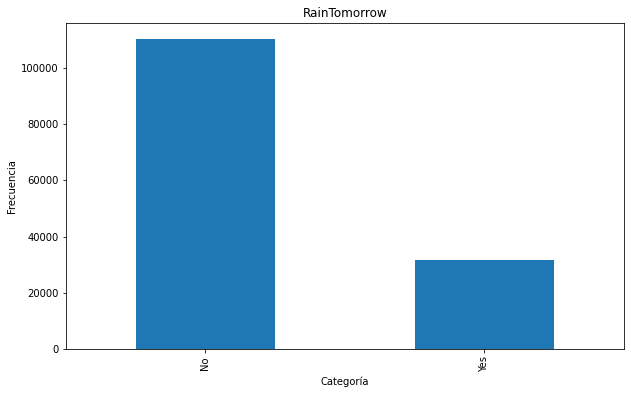

In [11]:
columnas_categoricas = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

# Crear un gráfico de barras para cada variable categórica
for columna in columnas_categoricas:
    plt.figure(figsize=(10, 6))
    data[columna].value_counts().plot(kind='bar')
    plt.title(columna)
    plt.xlabel('Categoría')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=90)  # Rotar etiquetas en el eje x para mayor legibilidad
    plt.show()

<a id = "5"></a><br>
# Análisis de datos

### Cruce de variables

In [12]:
# obtener temperatura mínima por ubicación
data[["Location", "MinTemp"]].groupby(["Location"], as_index = False).min().sort_values(by="MinTemp", ascending= True)

,Location,MinTemp
23,MountGinini,-8.5
40,Tuggeranong,-8.2
9,Canberra,-8.0
5,Ballarat,-5.6
3,AliceSprings,-5.2
34,Richmond,-4.8
42,WaggaWagga,-4.7
36,SalmonGums,-4.4
6,Bendigo,-4.0
35,Sale,-3.9


* La ubicación con la temperatura más baja resgristrada es MountGinini con -8.5 grados.

In [13]:
# obtener temperatura máxima por ubicación
data[["Location", "MaxTemp"]].groupby(["Location"], as_index = False).max().sort_values(by="MaxTemp", ascending= False)

,Location,MaxTemp
48,Woomera,48.1
21,Moree,47.3
34,Richmond,47.0
30,Penrith,46.9
19,MelbourneAirport,46.8
44,Watsonia,46.7
20,Mildura,46.7
10,Cobar,46.6
18,Melbourne,46.4
38,SydneyAirport,46.4


* La ubicación con la temperatura más alta es Woomera con 48.1 grados.

In [14]:
# Obtener promedio de cantidad de sol al día por ubicación
data[["Location", "Sunshine"]].groupby(["Location"], as_index = False).mean().sort_values(by="Sunshine", ascending= True)

,Location,Sunshine
44,Watsonia,6.378152
19,MelbourneAirport,6.381283
12,Dartmoor,6.412715
18,Melbourne,6.465776
33,Portland,6.496751
22,MountGambier,6.511167
15,Hobart,6.578324
1,Albany,6.658765
35,Sale,6.683663
27,NorfolkIsland,7.021751


In [15]:
# Cruce columnas cantidad de humedad a las 9am y RainToday
lluvia_humedad_9am = data[["RainToday", "Humidity9am"]].groupby(["RainToday"], as_index=False).mean().sort_values(by="Humidity9am", ascending=True)
# Cruce columnas cantidad de humedad a las 3pm y RainToday
lluvia_humedad_3pm = data[["RainToday", "Humidity3pm"]].groupby(["RainToday"], as_index=False).mean().sort_values(by="Humidity3pm", ascending=True)

print("Humedad a las 9am:")
print(lluvia_humedad_9am)
print("\nHumedad a las 3pm:")
print(lluvia_humedad_3pm)

Humedad a las 9am:
  RainToday  Humidity9am
0        No    65.221578
1       Yes    81.413254

Humedad a las 3pm:
  RainToday  Humidity3pm
0        No    47.232683
1       Yes    66.179459


* Existe un pequeña diferencia que sugieren que la humedad tiende a ser un poco más alta en los días que llueve en comparación con los días que no llueve, tanto por la mañana como por la tarde

In [16]:
# Cruce RainToday con la presión atmosférica a las 9am
rain_pressure_9am = data[["RainToday", "Pressure9am"]].groupby(["RainToday"], as_index=False).mean().sort_values(by="Pressure9am", ascending=True)

# Cruce RainToday con la presión atmosférica a las 3pm
rain_pressure_3pm = data[["RainToday", "Pressure3pm"]].groupby(["RainToday"], as_index=False).mean().sort_values(by="Pressure3pm", ascending=True)

print("Presión atmosférica a las 9am:")
print(rain_pressure_9am)
print("\nPresión atmosférica a las 3pm:")
print(rain_pressure_3pm)

Presión atmosférica a las 9am:
  RainToday  Pressure9am
1       Yes  1015.141788
0        No  1018.378282

Presión atmosférica a las 3pm:
  RainToday  Pressure3pm
1       Yes  1013.864569
0        No  1015.659341


* La presión atmosférica tiende a ser un poco más baja tanto por la mañana como por la tarde en los días que llueve en comparación con los días que no llueve

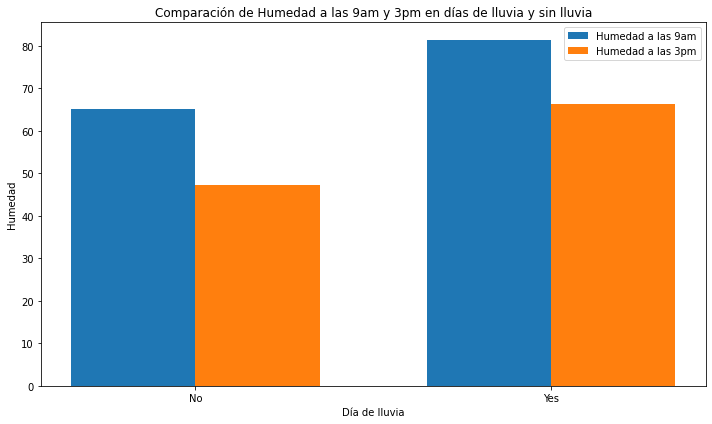

In [17]:
rain_today = lluvia_humedad_9am["RainToday"]
humidity_9am = lluvia_humedad_9am["Humidity9am"]
humidity_3pm = lluvia_humedad_3pm["Humidity3pm"]

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = range(len(rain_today))
bar1 = ax.bar(index, humidity_9am, bar_width, label='Humedad a las 9am')
bar2 = ax.bar([i + bar_width for i in index], humidity_3pm, bar_width, label='Humedad a las 3pm')
ax.set_xlabel('Día de lluvia')
ax.set_ylabel('Humedad')
ax.set_title('Comparación de Humedad a las 9am y 3pm en días de lluvia y sin lluvia')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(rain_today)
ax.legend()
plt.tight_layout()
plt.show()

In [18]:
# Cruce RainToday con la presión atmosférica a las 9am
rain_pressure_9am = data[["RainToday", "Pressure9am"]].groupby(["RainToday"], as_index=False).mean().sort_values(by="Pressure9am", ascending=True)

# Cruce RainToday con la presión atmosférica a las 3pm
rain_pressure_3pm = data[["RainToday", "Pressure3pm"]].groupby(["RainToday"], as_index=False).mean().sort_values(by="Pressure3pm", ascending=True)

print("Presión atmosférica a las 9am:")
print(rain_pressure_9am)
print("\nPresión atmosférica a las 3pm:")
print(rain_pressure_3pm)


Presión atmosférica a las 9am:
  RainToday  Pressure9am
1       Yes  1015.141788
0        No  1018.378282

Presión atmosférica a las 3pm:
  RainToday  Pressure3pm
1       Yes  1013.864569
0        No  1015.659341


* La presión atmosférica tiende a ser un poco más baja tanto por la mañana como por la tarde en los días que llueve en comparación con los días que no llueve

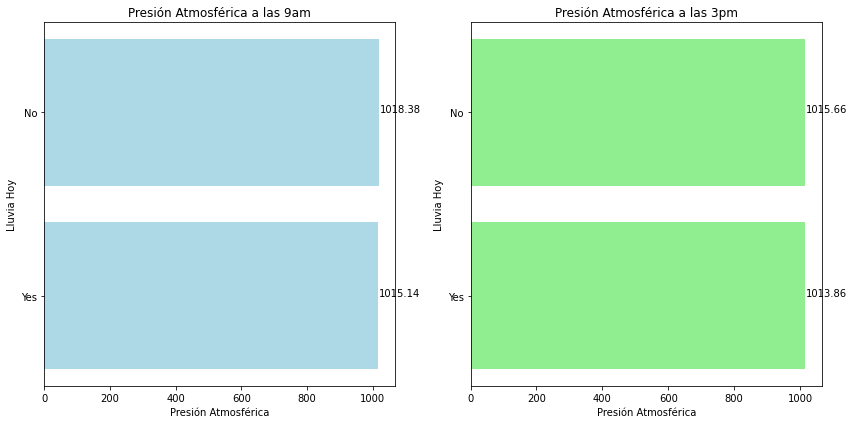

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].barh(rain_pressure_9am["RainToday"], rain_pressure_9am["Pressure9am"], color='lightblue')
ax[0].set_title('Presión Atmosférica a las 9am')
ax[0].set_xlabel('Presión Atmosférica')
ax[0].set_ylabel('Lluvia Hoy')
for i, v in enumerate(rain_pressure_9am["Pressure9am"]):
    ax[0].text(v + 3, i, str(round(v, 2)), color='black')
ax[1].barh(rain_pressure_3pm["RainToday"], rain_pressure_3pm["Pressure3pm"], color='lightgreen')
ax[1].set_title('Presión Atmosférica a las 3pm')
ax[1].set_xlabel('Presión Atmosférica')
ax[1].set_ylabel('Lluvia Hoy')
for i, v in enumerate(rain_pressure_3pm["Pressure3pm"]):
    ax[1].text(v + 3, i, str(round(v, 2)), color='black')

plt.tight_layout()
plt.show()

In [20]:
rain_cloud_9am = data[["RainToday", "Cloud9am"]].groupby(["RainToday"], as_index=False).mean()

# Cruce RainToday con la cantidad de nubes cubriendo el cielo a las 3pm
rain_cloud_3pm = data[["RainToday", "Cloud3pm"]].groupby(["RainToday"], as_index=False).mean()

print("Cantidad de nubes a las 9am:")
print(rain_cloud_9am)
print("\Cantidad de nubes a las 3pm:")
print(rain_cloud_3pm)


Cantidad de nubes a las 9am:
  RainToday  Cloud9am
0        No  3.939797
1       Yes  6.018474
\Cantidad de nubes a las 3pm:
  RainToday  Cloud3pm
0        No  4.086652
1       Yes  5.827074


* Los dias que comienza a llover tienen mayor cobertura las nubes en el cielo
* Cuando hay mayor cantidad de nubes hay mas probabilidades de que llueva

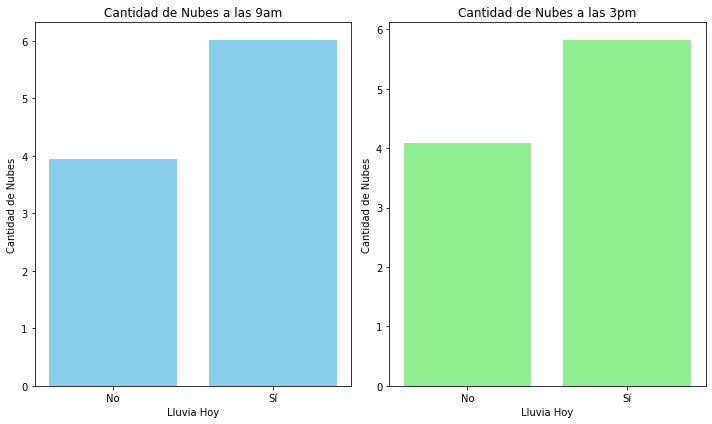

In [21]:

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.bar(rain_cloud_9am["RainToday"], rain_cloud_9am["Cloud9am"], color='skyblue')
plt.title('Cantidad de Nubes a las 9am')
plt.xlabel('Lluvia Hoy')
plt.ylabel('Cantidad de Nubes')
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])
plt.subplot(1, 2, 2)
plt.bar(rain_cloud_3pm["RainToday"], rain_cloud_3pm["Cloud3pm"], color='lightgreen')
plt.title('Cantidad de Nubes a las 3pm')
plt.xlabel('Lluvia Hoy')
plt.ylabel('Cantidad de Nubes')
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])
plt.tight_layout()
plt.show()

In [22]:
# Cruce RainToday con la cantidad de lluvia
rain_rainfall = data[["RainToday", "Rainfall"]].groupby(["RainToday"], as_index=False).mean()

print("Cruce de día de lluvia y cantidad de lluvia caída:")
print(rain_rainfall)

Cruce de día de lluvia y cantidad de lluvia caída:
  RainToday   Rainfall
0        No   0.075187
1       Yes  10.256732


* Promedio de lluvia en mm que cae el día llovido

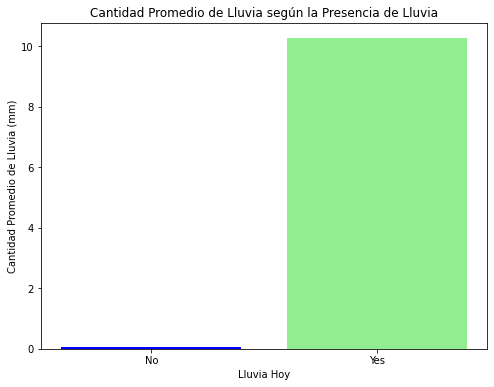

In [23]:

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(rain_rainfall["RainToday"], rain_rainfall["Rainfall"], color=['blue', 'lightgreen'])
plt.xlabel('Lluvia Hoy')
plt.ylabel('Cantidad Promedio de Lluvia (mm)')
plt.title('Cantidad Promedio de Lluvia según la Presencia de Lluvia')
plt.show()

In [24]:
# Cruce de la temperatura con la humedad a las 3pm 
temp_humedad = data.groupby(["Temp3pm"], as_index=False)["Humidity3pm"].mean()

print("Cruce de temperatura y humedad a las 3pm:")
print(temp_humedad)

Cruce de temperatura y humedad a las 3pm:
     Temp3pm  Humidity3pm
0       -5.4         98.0
1       -5.1         83.0
2       -4.4         97.0
3       -4.2         98.0
4       -4.1         96.0
..       ...          ...
495     45.8          3.0
496     45.9         14.0
497     46.1          9.0
498     46.2         14.0
499     46.7         10.0

[500 rows x 2 columns]


* Se realiza el cruce de la humedad a las 3pm porque a esa hora del día, las temperaturas suelen alcanzar su punto máximo y es más probable que ocurra la lluvia

In [25]:
# Cruce RainToday con la cantidad de nubes cubriendo el cielo a las 9am
rain_cloud_9am = data[["RainToday", "Cloud9am"]].groupby(["RainToday"], as_index=False).mean()

# Cruce RainToday con la cantidad de nubes cubriendo el cielo a las 3pm
rain_cloud_3pm = data[["RainToday", "Cloud3pm"]].groupby(["RainToday"], as_index=False).mean()

print("Cantidad de nubes a las 9am:")
print(rain_cloud_9am)
print("\Cantidad de nubes a las 3pm:")
print(rain_cloud_3pm)

Cantidad de nubes a las 9am:
  RainToday  Cloud9am
0        No  3.939797
1       Yes  6.018474
\Cantidad de nubes a las 3pm:
  RainToday  Cloud3pm
0        No  4.086652
1       Yes  5.827074


* Los dias que comienza a llover tienen mayor cobertura las nubes en el cielo

In [26]:
# Cruce RainToday con la cantidad de lluvia
rain_rainfall = data[["RainToday", "Rainfall"]].groupby(["RainToday"], as_index=False).mean()

print("Cruce de día de lluvia y cantidad de lluvia caída:")
print(rain_rainfall)

Cruce de día de lluvia y cantidad de lluvia caída:
  RainToday   Rainfall
0        No   0.075187
1       Yes  10.256732


* Promedio de lluvia en mm que cae el día llovido

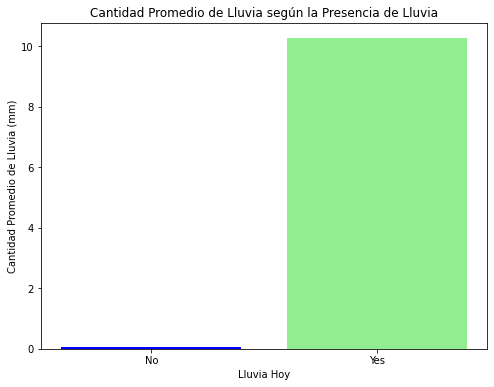

In [27]:


# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(rain_rainfall["RainToday"], rain_rainfall["Rainfall"], color=['blue', 'lightgreen'])
plt.xlabel('Lluvia Hoy')
plt.ylabel('Cantidad Promedio de Lluvia (mm)')
plt.title('Cantidad Promedio de Lluvia según la Presencia de Lluvia')
plt.show()


In [28]:
# Cruce de la temperatura con la humedad a las 3pm 
temp_humedad = data.groupby(["Temp3pm"], as_index=False)["Humidity3pm"].mean()

print("Cruce de temperatura y humedad a las 3pm:")
print(temp_humedad)

Cruce de temperatura y humedad a las 3pm:
     Temp3pm  Humidity3pm
0       -5.4         98.0
1       -5.1         83.0
2       -4.4         97.0
3       -4.2         98.0
4       -4.1         96.0
..       ...          ...
495     45.8          3.0
496     45.9         14.0
497     46.1          9.0
498     46.2         14.0
499     46.7         10.0

[500 rows x 2 columns]


* Se realiza el cruce de la humedad a las 3pm porque a esa hora del día, las temperaturas suelen alcanzar su punto máximo y es más probable que ocurra la lluvia

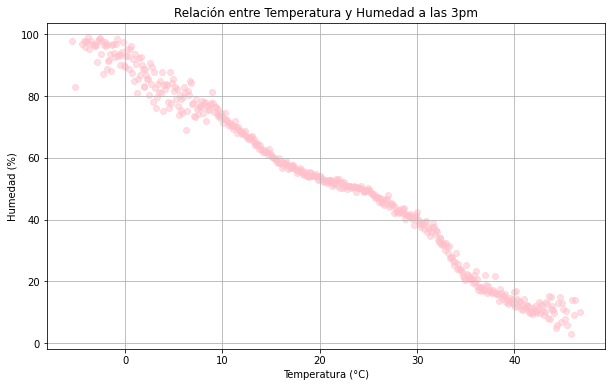

In [29]:

temperatura = temp_humedad["Temp3pm"]
humedad = temp_humedad["Humidity3pm"]

plt.figure(figsize=(10, 6))
plt.scatter(temperatura, humedad, color='pink', alpha=0.5)
plt.title('Relación entre Temperatura y Humedad a las 3pm')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Humedad (%)')
plt.grid(True)
plt.show()

In [30]:
# Cruce de Dirección de ráfaga de viento más fuerte y día de lluvia
dirección_viento_lluvia = data[["WindGustDir", "RainToday"]].groupby(["WindGustDir", "RainToday"], as_index=False).size()

print("Cruce de dirección de ráfaga de viento más fuerte y día de lluvia:")
print(dirección_viento_lluvia)


Cruce de dirección de ráfaga de viento más fuerte y día de lluvia:
   WindGustDir RainToday  size
0            E        No  7677
1            E       Yes  1308
2          ENE        No  6743
3          ENE       Yes  1181
4          ESE        No  5983
5          ESE       Yes  1261
6            N        No  7552
7            N       Yes  1389
8           NE        No  6077
9           NE       Yes   925
10         NNE        No  5480
11         NNE       Yes   892
12         NNW        No  5242
13         NNW       Yes  1269
14          NW        No  6108
15          NW       Yes  1831
16           S        No  6431
17           S       Yes  2428
18          SE        No  7363
19          SE       Yes  1878
20         SSE        No  6858
21         SSE       Yes  2047
22         SSW        No  6082
23         SSW       Yes  2459
24          SW        No  6219
25          SW       Yes  2483
26           W        No  6761
27           W       Yes  2935
28         WNW        No  5791
29 

* Cruce de las columnas WindGustDir y RainToday donde se puede obtener que dirección de ráfaga de viento más fuerte toman cuando llueve y no llueve

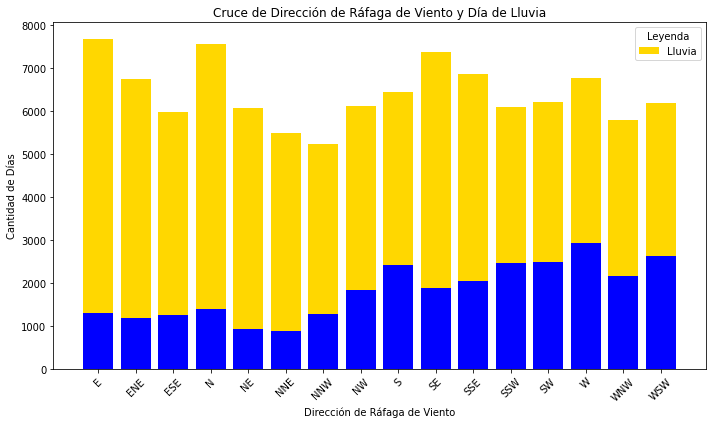

In [31]:
dirección_viento_lluvia_df = pd.DataFrame(dirección_viento_lluvia)
colors = ['gold', 'blue']
plt.figure(figsize=(10, 6))
plt.bar(dirección_viento_lluvia_df["WindGustDir"], dirección_viento_lluvia_df["size"], color=colors)
plt.xlabel('Dirección de Ráfaga de Viento')
plt.ylabel('Cantidad de Días')
plt.title('Cruce de Dirección de Ráfaga de Viento y Día de Lluvia')
plt.legend(['Lluvia', 'Sin lluvia'], title='Leyenda', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [32]:
# Cruce de Velocidad de ráfaga de viento más fuerte y día de lluvia
velocidad_viento_lluvia = data[["WindGustSpeed", "RainToday"]].groupby(["WindGustSpeed", "RainToday"], as_index=False).size()

print("Cruce de velocidad de ráfaga de viento más fuerte y día de lluvia:")
print(velocidad_viento_lluvia)

Cruce de velocidad de ráfaga de viento más fuerte y día de lluvia:
     WindGustSpeed RainToday  size
0              6.0        No     1
1              7.0        No    17
2              7.0       Yes     1
3              9.0        No    86
4              9.0       Yes     5
..             ...       ...   ...
120          122.0        No     2
121          124.0        No     2
122          126.0       Yes     2
123          130.0        No     1
124          135.0       Yes     2

[125 rows x 3 columns]


* Cruce de las columnas WindGustDir y RainToday donde se puede obtener que velocidad de ráfaga de viento más fuerte toman cuando llueve y no llueve

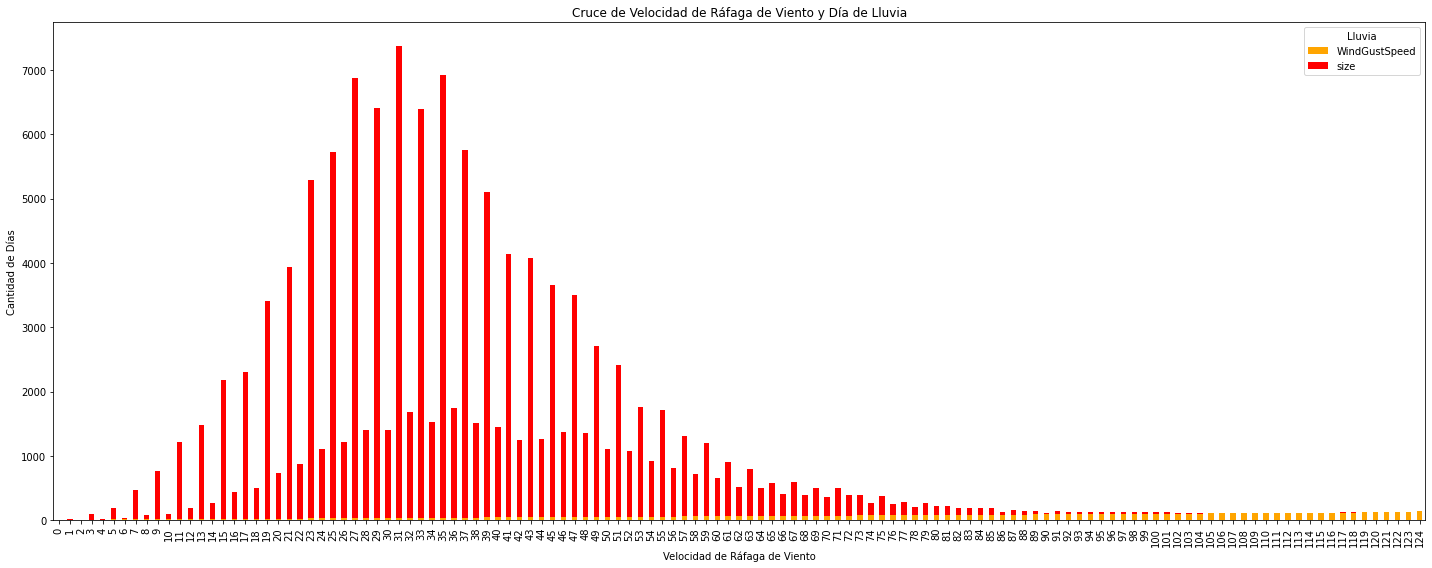

In [33]:
colors = ['orange', 'red']
velocidad_viento_lluvia.plot(kind='bar', stacked=True, color=colors, figsize=(20, 8))
plt.xlabel('Velocidad de Ráfaga de Viento')
plt.ylabel('Cantidad de Días')
plt.title('Cruce de Velocidad de Ráfaga de Viento y Día de Lluvia')
plt.legend(title='Lluvia', loc='upper right')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


* Cruce de las columnas WindGustDir y RainToday donde se puede obtener que dirección de ráfaga de viento más fuerte toman cuando llueve

In [34]:
data_lluvia = data[data["RainToday"] == "Yes"]

# Cruce de Dirección de ráfaga de viento más fuerte y día de lluvia
dirección_viento_lluvia = data_lluvia[["WindGustDir", "RainToday"]].groupby(["WindGustDir", "RainToday"], as_index=False).size()

print("Cruce de Dirección de ráfaga de viento más fuerte y día de lluvia")
print(dirección_viento_lluvia)

Cruce de Dirección de ráfaga de viento más fuerte y día de lluvia
   WindGustDir RainToday  size
0            E       Yes  1308
1          ENE       Yes  1181
2          ESE       Yes  1261
3            N       Yes  1389
4           NE       Yes   925
5          NNE       Yes   892
6          NNW       Yes  1269
7           NW       Yes  1831
8            S       Yes  2428
9           SE       Yes  1878
10         SSE       Yes  2047
11         SSW       Yes  2459
12          SW       Yes  2483
13           W       Yes  2935
14         WNW       Yes  2169
15         WSW       Yes  2620



* La dirección de viento más común durante los días de lluvia es hacia el oeste (W), luego las direcciones suroeste (WSW) y sureste (SE).

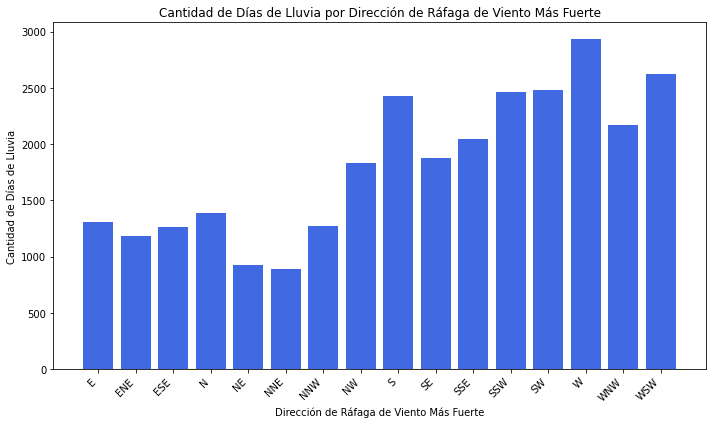

In [35]:
plt.figure(figsize=(10, 6))
plt.bar(dirección_viento_lluvia["WindGustDir"], dirección_viento_lluvia["size"], color='royalblue')
plt.xlabel('Dirección de Ráfaga de Viento Más Fuerte')
plt.ylabel('Cantidad de Días de Lluvia')
plt.title('Cantidad de Días de Lluvia por Dirección de Ráfaga de Viento Más Fuerte')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [36]:
data_lluvia = data[data["RainToday"] == "Yes"]

# Cruce de Velocidad de ráfaga de viento más fuerte y día de lluvia
velocidad_viento_lluvia = data_lluvia[["WindGustSpeed", "RainToday"]].groupby(["WindGustSpeed", "RainToday"], as_index=False).size()

print("Cruce de Velocidad de ráfaga de viento más fuerte y día de lluvia")
print(velocidad_viento_lluvia)

Cruce de Velocidad de ráfaga de viento más fuerte y día de lluvia
    WindGustSpeed RainToday  size
0             7.0       Yes     1
1             9.0       Yes     5
2            11.0       Yes    16
3            13.0       Yes    69
4            15.0       Yes    83
..            ...       ...   ...
56          111.0       Yes     2
57          113.0       Yes     2
58          117.0       Yes     4
59          126.0       Yes     2
60          135.0       Yes     2

[61 rows x 3 columns]


* Cruce de las columnas WindGustDir y RainToday donde se puede obtener que velocidad de ráfaga de viento más fuerte toman cuando llueve

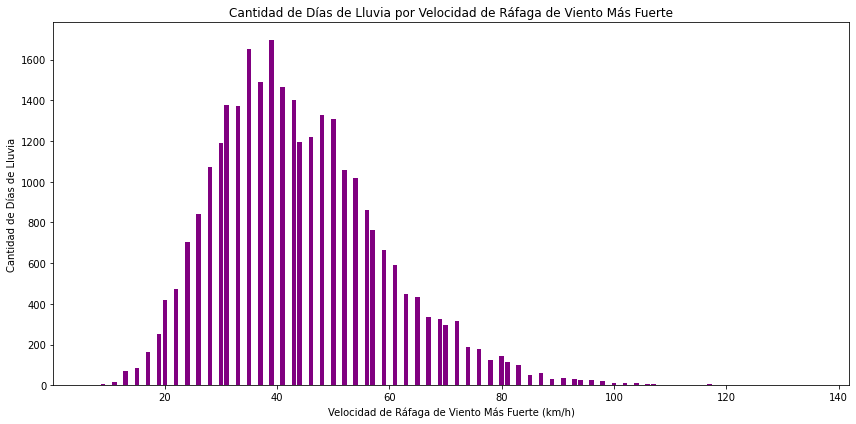

In [37]:
plt.figure(figsize=(12, 6))
plt.bar(velocidad_viento_lluvia["WindGustSpeed"], velocidad_viento_lluvia["size"], color='purple')
plt.xlabel('Velocidad de Ráfaga de Viento Más Fuerte (km/h)')
plt.ylabel('Cantidad de Días de Lluvia')
plt.title('Cantidad de Días de Lluvia por Velocidad de Ráfaga de Viento Más Fuerte')
plt.tight_layout()
plt.show()



* Creación de una nueva columna 'RainTomorrow' para saber si lloverá o no al día siguiente

# Anomalias

In [38]:
def fc_anomalias(df, cols):
    anomalias_indices = []
    
    for col in cols:
        # Primer cuartil
        Q1 = np.percentile(df[col], 25)
        # Tercer cuartil
        Q3 = np.percentile(df[col], 75)
        # IQR
        IQR = Q3 - Q1
        
        # Paso de anomalía
        anomalia_paso = IQR * 1.5
        
        # Detectar anomalías y sus índices
        indices_anomalias = df[(df[col] < Q1 - anomalia_paso) | (df[col] > Q3 + anomalia_paso)].index
        anomalias_indices.extend(indices_anomalias)
        
    anomalias_indices = Counter(anomalias_indices)
    # Filtrar índices de anomalías múltiples
    multiple_anomalias = [i for i, v in anomalias_indices.items() if v > 2]
    
    return multiple_anomalias

In [39]:
# Llamar a la función con las columnas especificadas
data.loc[fc_anomalias(data,['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'])]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow


# Buscando valores nulos

In [43]:
# identificando columnas con datos nulos
data.columns[data.isnull().any()]

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')

In [44]:
# viendo la cantidad de nulos de cada columna
data.isnull().sum().sort_values(ascending=False)

Sunshine         67816
Evaporation      60843
Cloud3pm         57094
Cloud9am         53657
Pressure9am      14014
Pressure3pm      13981
WindDir9am       10013
WindGustDir       9330
WindGustSpeed     9270
WindDir3pm        3778
Humidity3pm       3610
Temp3pm           2726
WindSpeed3pm      2630
Humidity9am       1774
RainToday         1406
Rainfall          1406
WindSpeed9am      1348
Temp9am            904
MinTemp            637
MaxTemp            322
RISK_MM              0
Date                 0
Location             0
RainTomorrow         0
dtype: int64

# Reemplazando valores nulos

In [45]:
# Buscaremos la moda de la temperatura mínima según la ubicación
moda_mintemp = data.groupby('Location')['MinTemp'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
print(moda_mintemp)

0         10.0
1         10.0
2         10.0
3         10.0
4         10.0
          ... 
142188    21.3
142189    21.3
142190    21.3
142191    21.3
142192    21.3
Name: MinTemp, Length: 142193, dtype: float64


In [46]:
# reemplazando los nulos por moda según ubicación
data["MinTemp"].fillna(moda_mintemp, inplace=True)

In [47]:
# visulizando si quedan nulos
data[data["MinTemp"].isnull()]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow


In [48]:
# Buscaremos la moda de la temperatura máxima según la ubicación
moda_maxtemp = data.groupby('Location')['MaxTemp'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
print(moda_maxtemp)

0         14.9
1         14.9
2         14.9
3         14.9
4         14.9
          ... 
142188    39.1
142189    39.1
142190    39.1
142191    39.1
142192    39.1
Name: MaxTemp, Length: 142193, dtype: float64


In [49]:
# reemplazando los nulos por moda según ubicación
data["MaxTemp"].fillna(moda_maxtemp, inplace=True)

In [50]:
# visulizando si quedan nulos
data[data["MaxTemp"].isnull()]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow


In [51]:
# Convertir los valores catagóricos dede 'RainTomorrow' en numericos ('Yes' -> 1, 'No' -> 0)
data['RainTomorrow_num'] = data['RainTomorrow'].map({'Yes': 1, 'No': 0})

In [52]:
# buscando el promedio de RainTomorrow según ubicación
prom_raint = data.groupby('Location')['RainTomorrow_num'].mean()

In [53]:
# reemplazando los nulos por promedio según ubicación
data["RainTomorrow"].fillna(prom_raint, inplace=True)

In [54]:
# visulizando si quedan nulos
data[data["RainTomorrow"].isnull()]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,RainTomorrow_num


In [55]:
# Convertir los valores catagóricos dede 'RainToday' en numericos ('Yes' -> 1, 'No' -> 0)
data['RainToday_num'] = data['RainToday'].map({'Yes': 1, 'No': 0})

In [56]:
# buscando el promedio de RainToday según ubicación
prom_rainToday = data.groupby('Location')['RainToday_num'].transform('mean')

In [57]:
# reemplazando los nulos por promedio según ubicación
data["RainToday"].fillna(prom_rainToday, inplace=True)

In [58]:
# visulizando si quedan nulos
data[data["RainToday"].isnull()]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,RainTomorrow_num,RainToday_num


In [59]:
# buscando el promedio de Temp9am según ubicación
prom_temp9 = data.groupby('Location')['Temp9am'].transform('mean')

In [60]:
# reemplazando los nulos por promedio según ubicación
data["Temp9am"].fillna(prom_temp9, inplace=True)

In [61]:
# visulizando si quedan nulos
data[data["Temp9am"].isnull()]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,RainTomorrow_num,RainToday_num


In [62]:
# buscando el promedio de Temp3pm según ubicación
prom_temp3 = data.groupby('Location')['Temp3pm'].transform('mean')

In [63]:
# reemplazando los nulos por promedio según ubicación
data["Temp3pm"].fillna(prom_temp3, inplace=True)

In [64]:
# visulizando si quedan nulos
data[data["Temp3pm"].isnull()]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,RainTomorrow_num,RainToday_num


In [65]:
# buscando el promedio de Rainfall según ubicación
prom_rainfall = data.groupby('Location')['Rainfall'].transform('mean')

In [66]:
# reemplazando los nulos por promedio según ubicación
data["Rainfall"].fillna(prom_rainfall, inplace=True)

In [67]:
# visulizando si quedan nulos
data[data["Rainfall"].isnull()]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,RainTomorrow_num,RainToday_num


In [68]:
# buscando la moda de WindSpeed9am según WindDir9am
moda_windS9 = data.groupby('WindDir9am')['WindSpeed9am'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
moda_windS9

0         13.0
1         13.0
2         13.0
3          9.0
4          9.0
          ... 
142188     9.0
142189     9.0
142190     9.0
142191     9.0
142192    13.0
Name: WindSpeed9am, Length: 132180, dtype: float64

In [69]:
# reemplazando los nulos por moda según WindDir9am
data["WindSpeed9am"].fillna(moda_windS9, inplace=True)

In [70]:
# visulizando si quedan nulos
data[data["WindSpeed9am"].isnull()]


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,RainTomorrow_num,RainToday_num
14,2008-12-16,Albury,9.8,27.7,1.925710,NaN,NaN,WNW,50.0,NaN,...,1010.3,0.0,NaN,17.300000,26.2,0.205617,0.0,No,0,NaN
433,2010-02-10,Albury,21.7,35.6,1.925710,NaN,NaN,SSW,46.0,NaN,...,1014.7,NaN,4.0,25.200000,32.9,0.205617,0.0,No,0,NaN
434,2010-02-12,Albury,22.5,29.1,1.925710,NaN,NaN,SW,24.0,NaN,...,1007.8,NaN,7.0,23.400000,26.4,0.205617,0.0,No,0,NaN
1540,2013-06-05,Albury,3.5,13.6,0.000000,NaN,NaN,E,59.0,NaN,...,1022.2,5.0,NaN,8.100000,13.2,No,0.4,No,0,0.0
3285,2009-10-05,BadgerysCreek,8.9,21.0,2.207925,NaN,NaN,S,46.0,NaN,...,1016.9,NaN,NaN,16.574141,18.7,0.198818,13.6,Yes,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141823,2016-06-17,Uluru,8.2,21.9,0.000000,NaN,NaN,NaN,NaN,NaN,...,1013.3,NaN,NaN,11.500000,20.9,No,0.0,No,0,0.0
141824,2016-06-18,Uluru,8.7,18.9,0.000000,NaN,NaN,NaN,NaN,NaN,...,1016.8,1.0,3.0,12.300000,17.9,No,0.0,No,0,0.0
141825,2016-06-19,Uluru,3.4,18.3,0.000000,NaN,NaN,NaN,NaN,NaN,...,1017.3,NaN,NaN,8.200000,16.9,No,0.0,No,0,0.0
141826,2016-06-20,Uluru,2.2,21.5,0.000000,NaN,NaN,NaN,NaN,NaN,...,1014.1,NaN,NaN,8.500000,20.5,No,0.0,No,0,0.0


In [71]:
# Buscaremos la moda de WindDir3pm según la ubicación
moda_windD3 = data.groupby('Location')['WindDir3pm'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan)[0]
moda_windD3

'W'

In [72]:
# reemplazando los nulos por moda según ubicación
data["WindDir3pm"].fillna(moda_windD3, inplace=True)

In [73]:
# visulizando si quedan nulos
data[data["WindDir3pm"].isnull()]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,RainTomorrow_num,RainToday_num


In [74]:
# buscando la moda de WindSpeed3pm según WindDir3pm
moda_windS3 = data.groupby('WindDir3pm')['WindSpeed3pm'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan)

In [75]:
# reemplazando los nulos por moda según WindDir9am
data["WindSpeed3pm"].fillna(moda_windS3, inplace=True)

In [76]:
# visulizando si quedan nulos
data[data["WindSpeed3pm"].isnull()]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,RainTomorrow_num,RainToday_num


In [77]:
# buscando la moda de WindGustDir según ubicación
moda_windG = data.groupby('Location')['WindGustDir'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan)[0]

In [78]:
# reemplazando los nulos por moda según ubicación
data["WindGustDir"].fillna(moda_windG, inplace=True)

In [79]:
# visulizando si quedan nulos
data[data["WindGustDir"].isnull()]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,RainTomorrow_num,RainToday_num


In [80]:
# Buscaremos la moda de 'Cloud3pm' según la ubicación
moda_cloud3 = data.groupby('Location')['Cloud3pm'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan)[0]
moda_cloud3

8.0

In [81]:
# reemplazando los nulos por moda según ubicación
data["Cloud3pm"].fillna(moda_cloud3, inplace=True)

In [82]:
# visulizando si quedan nulos
data[data["Cloud3pm"].isnull()]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,RainTomorrow_num,RainToday_num


In [83]:
# viendo la cantidad de nulos de cada columna
data.isnull().sum().sort_values(ascending=False)

Sunshine            67816
Evaporation         60843
Cloud9am            53657
Pressure9am         14014
Pressure3pm         13981
WindDir9am          10013
WindGustSpeed        9270
Humidity3pm          3610
Humidity9am          1774
RainToday_num        1406
WindSpeed9am         1348
WindDir3pm              0
WindSpeed3pm            0
Location                0
WindGustDir             0
Rainfall                0
MaxTemp                 0
MinTemp                 0
Cloud3pm                0
Temp9am                 0
Temp3pm                 0
RainToday               0
RISK_MM                 0
RainTomorrow            0
RainTomorrow_num        0
Date                    0
dtype: int64

In [84]:
# Transformar los datos en 0 y 1
data['RainTomorrow'] = data['RainTomorrow'].map({'No': 0, 'Yes': 1})

In [85]:
# Transformar los datos en 0 y 1
data['RainToday'] = data['RainToday'].map({'No': 0, 'Yes': 1})

# Correlación

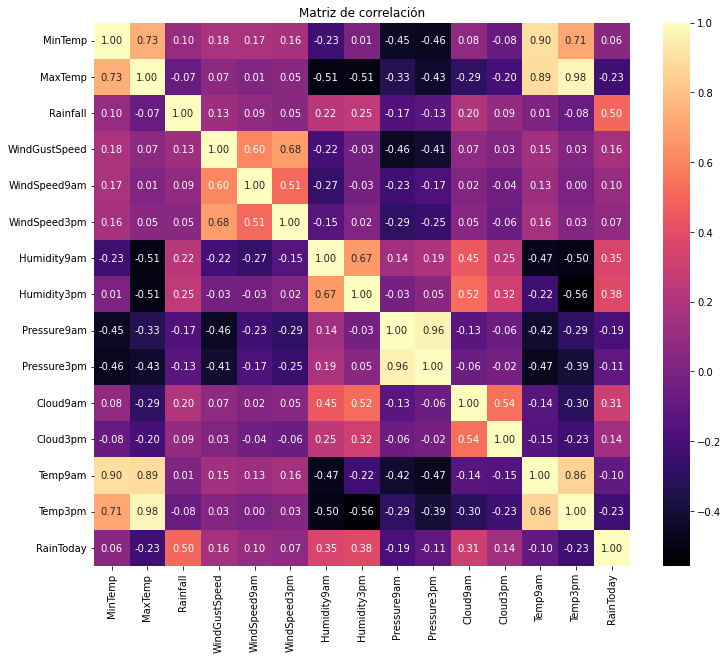

In [86]:
selec_columns = ["MinTemp", "MaxTemp", "Rainfall",
                    "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm",
                    "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm",
                    "Cloud9am", "Cloud3pm", "Temp9am", "Temp3pm", "RainToday"]
correlation_matrix = data[selec_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

* RainToday - WindSpeed9am

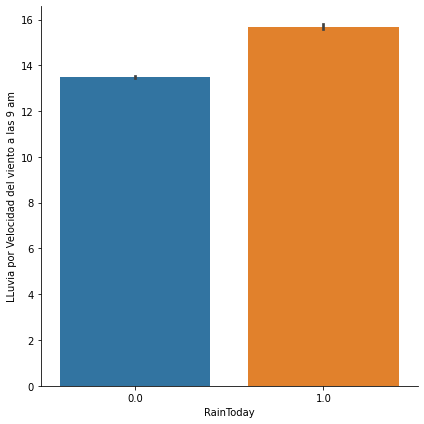

In [87]:
g = sns.catplot(x="RainToday", y="WindSpeed9am", data=data, kind="bar", height=6)
g.set_ylabels("LLuvia por Velocidad del viento a las 9 am")
plt.show()

* RainToday - WindSpeed3pm

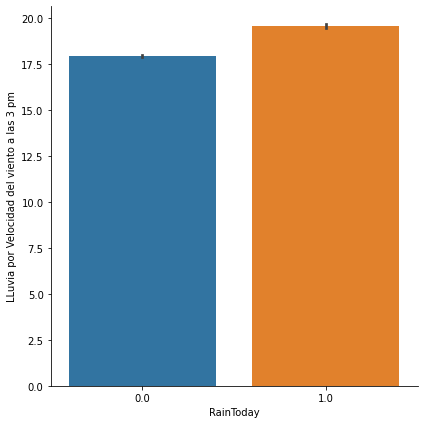

In [88]:
g = sns.catplot(x="RainToday", y="WindSpeed3pm", data=data, kind="bar", height=6)
g.set_ylabels("LLuvia por Velocidad del viento a las 3 pm")
plt.show()

* RainToday - Humidity9am


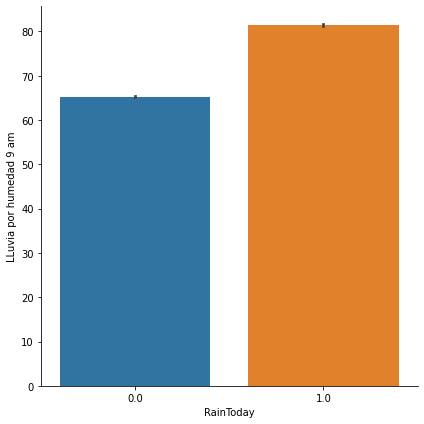

In [89]:
g = sns.catplot(x="RainToday", y="Humidity9am", data=data, kind="bar", height=6)
g.set_ylabels("LLuvia por humedad 9 am")
plt.show()

* RainToday - Humidity3pm

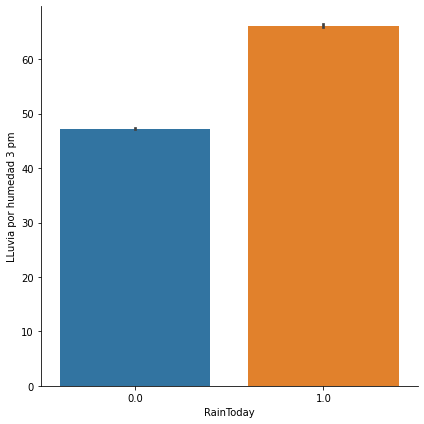

In [90]:
g = sns.catplot(x="RainToday", y="Humidity3pm", data=data, kind="bar", height=6)
g.set_ylabels("LLuvia por humedad 3 pm")
plt.show()

* RainToday - Pressure9am

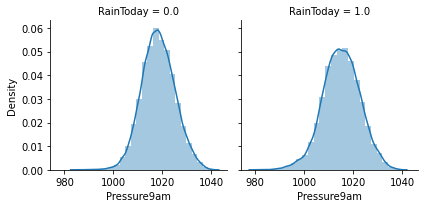

In [91]:
g = sns.FacetGrid(data, col="RainToday")
g.map(sns.distplot, "Pressure9am", bins=25)
plt.show()

* RainToday - Pressure3pm

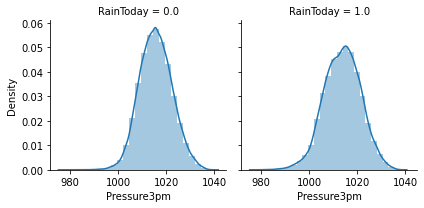

In [92]:
g = sns.FacetGrid(data, col="RainToday")
g.map(sns.distplot, "Pressure3pm", bins=25)
plt.show()

* RainToday - Cloud9am

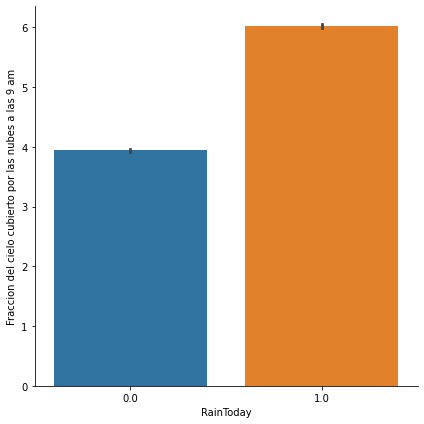

In [93]:
g = sns.catplot(x="RainToday", y="Cloud9am", data=data, kind="bar", height=6)
g.set_ylabels("Fraccion del cielo cubierto por las nubes a las 9 am")
plt.show()

* RainToday - Cloud3pm

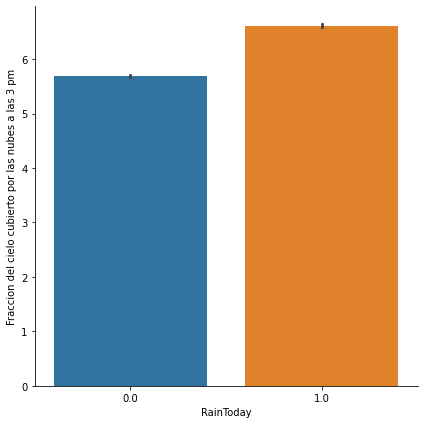

In [94]:
g = sns.catplot(x="RainToday", y="Cloud3pm", data=data, kind="bar", height=6)
g.set_ylabels("Fraccion del cielo cubierto por las nubes a las 3 pm")
plt.show()

In [95]:
 #exportar como csv
data.to_csv("australiaEDA.csv")